# 如何用Python探索系外行星觀測資料？
此notebook為[《資料視覺化：用Python為星空作畫》](https://github.com/YihaoSu/exploring-astronomy-with-python-from-data-query-to-visualization)一書的相關程式碼，由[蘇羿豪](https://astrobackhacker.tw/)編寫，並以[MIT授權條款](https://github.com/YihaoSu/exploring-astronomy-with-python-from-data-query-to-visualization/blob/main/LICENSE)釋出(在寫書期間，我原本宣傳的書名為《用Python探索天文：從資料取得到視覺化》，後應出版社要求改為現名）。我會持續透過創作故事、遊戲等有趣體驗來向大眾推廣開放科學，歡迎你加入「[Astrohackers-TW: Python在天文領域的應用](https://www.facebook.com/groups/astrohackers.tw.py)」FB社團，並追蹤我的[Threads](https://www.threads.net/@astrobackhacker)。

## (一) 哪些系外行星觀測計畫有將資料開放給⼤眾使⽤？

以下列出幾個有開放下載[系外行星](https://zh.wikipedia.org/zh-tw/%E5%A4%AA%E9%99%BD%E7%B3%BB%E5%A4%96%E8%A1%8C%E6%98%9F)觀測資料的太空任務及資料庫網站：

### 凌日系外行星巡天衛星(Transiting Exoplanet Survey Satellite，簡稱TESS)
TESS是由美國太空總署主導的太空望遠鏡計畫，於2018年發射升空，主要任務是巡察全天空超過85%的區域範圍，觀測離地球較近的恆星，並以[凌日法](https://zh.wikipedia.org/zh-tw/%E7%B3%BB%E5%A4%96%E8%A1%8C%E6%98%9F%E5%81%B5%E6%B8%AC%E6%B3%95#%E5%87%8C%E6%97%A5%E6%B3%95)尋找可能環繞這些恆星運行的系外行星。你可以從這個網站進入它的資料下載入口：https://archive.stsci.edu/missions-and-data/tess

### 克卜勒太空望遠鏡(Kepler space telescope)和K2
在TESS運作之前，美國太空總署在2009年有發射一個名為克卜勒的太空望遠鏡，它也是用[凌日法](https://zh.wikipedia.org/zh-tw/%E7%B3%BB%E5%A4%96%E8%A1%8C%E6%98%9F%E5%81%B5%E6%B8%AC%E6%B3%95#%E5%87%8C%E6%97%A5%E6%B3%95)來搜尋系外行星，但只針對位於天鵝座和天琴座之間的一個固定區域進行觀測。克卜勒太空望遠鏡在2013年部份零件受損，導致原本的任務無法繼續，於是美國太空總署利用剩下尚能運作的儀器，改以新任務K2繼續進行觀測直到2018年。你可以從以下兩個連結分別進入Kepler和K2的資料下載入口：https://archive.stsci.edu/missions-and-data/kepler 和 https://archive.stsci.edu/missions-and-data/k2

### 美國太空總署的系外行星資料庫網站(NASA Exoplanet Archive)
[NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu)能查詢被TESS、Kepler和K2所發現的系外行星相關資訊，包含系外行星名稱、所屬恆星名稱、發現年份、發現方法、軌道週期、距離地球多遠、質量大小等等。

## (二) 如何用Python取得系外行星觀測資料？

[Lightkurve](https://docs.lightkurve.org/)套件能搜尋並下載Kepler太空望遠鏡和凌日系外行星巡天衛星的影像及[光變曲線](https://zh.wikipedia.org/zh-tw/%E5%85%89%E8%AE%8A%E6%9B%B2%E7%B7%9A)觀測資料，且能分析光變週期，以[凌日法](https://zh.wikipedia.org/zh-tw/%E7%B3%BB%E5%A4%96%E8%A1%8C%E6%98%9F%E5%81%B5%E6%B8%AC%E6%B3%95#%E5%87%8C%E6%97%A5%E6%B3%95)尋找系外行星。執行以下指令以安裝lightkurve：

In [ ]:
pip install lightkurve

### 用Lightkurve取得影像和光變曲線觀測資料的方法
Lightkurve有提供影像和光變曲線這兩種資料類型的相關物件，分別是[TargetPixelFile](https://docs.lightkurve.org/tutorials/1-getting-started/what-are-targetpixelfile-objects.html)和[LightCurve](https://docs.lightkurve.org/tutorials/1-getting-started/what-are-lightcurve-objects.html)。TargetPixelFile物件包含了望遠鏡的CCD相機在觀測目標星體期間所記錄的像素資料變化。你可以使用[search_targetpixelfile()](https://docs.lightkurve.org/reference/api/lightkurve.search_targetpixelfile.html)函式，輸入星體名稱或識別編碼後，就能搜尋並下載相關的Target Pixel File影像資料。至於LightCurve物件，則包含星體亮度隨時間變化的時間序列資料。你可以從一個TargetPixelFile物件中提取出LightCurve物件，或者直接使用[search_lightcurve()](https://docs.lightkurve.org/reference/api/lightkurve.search_lightcurve.html)函式來搜尋並下載光變曲線資料。

### 範例1：使用search_targetpixelfile()函式取得影像資料

In [1]:
# 引入lightkurve套件
import lightkurve as lk

# 設定想要查詢的系外行星所屬恆星的名稱，例如Kepler-10
target_name = 'Kepler-10'
# 設定是否要下載所有相關的Target Pixel File(TPF)
download_all = True
# 使用search_targetpixelfile()函式來搜尋目標星體的影像資料，這裡設定的任務名稱為Kepler，且只搜尋該任務的第10季觀測資料
tpf_search_result = lk.search_targetpixelfile(target_name, mission='Kepler', quarter=10)

# 依據download_all變數的設定值來決定下載方式。若設定為True，則使用download_all()來下載搜尋結果中所有的TPFs，若設為False，則用download()下載第一個TPF
if download_all:
    tpf_collection = tpf_search_result.download_all()
    # 顯示所有下載的TPFs檔案的路徑
    print([tpf.path for tpf in tpf_collection])
else:
    tpf = tpf_search_result[0].download()
    # 顯示下載的TPF檔案的路徑
    print(tpf.path)

# 顯示search_targetpixelfile()回傳的搜索結果
tpf_search_result

['/home/yhsu/.lightkurve/cache/mastDownload/Kepler/kplr011904151_sc_Q001313330333033302/kplr011904151-2011208035123_spd-targ.fits.gz', '/home/yhsu/.lightkurve/cache/mastDownload/Kepler/kplr011904151_sc_Q001313330333033302/kplr011904151-2011240104155_spd-targ.fits.gz', '/home/yhsu/.lightkurve/cache/mastDownload/Kepler/kplr011904151_sc_Q001313330333033302/kplr011904151-2011271113734_spd-targ.fits.gz', '/home/yhsu/.lightkurve/cache/mastDownload/Kepler/kplr011904151_lc_Q111111110111011101/kplr011904151-2011271113734_lpd-targ.fits.gz']


#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 10,2011,Kepler,60,kplr011904151,0.0
1,Kepler Quarter 10,2011,Kepler,60,kplr011904151,0.0
2,Kepler Quarter 10,2011,Kepler,60,kplr011904151,0.0
3,Kepler Quarter 10,2011,Kepler,1800,kplr011904151,0.0


### 範例2：使用search_lightcurve()函式取得光變曲線資料

In [2]:
# 引入lightkurve套件
import lightkurve as lk

# 設定想要查詢的系外行星所屬恆星的名稱，例如Kepler-10
target_name = 'Kepler-10'
# 設定觀測任務，可選Kepler、K2或TESS
mission_name = 'Kepler'

# 檢查使用者輸入的觀測任務名稱是否為Kepler、K2或TESS其中一個，若不是，則顯示提示訊息
if mission_name in ['Kepler', 'K2', 'TESS']:
    # 使用lsearch_lightcurve()函式搜尋目標星體的光變曲線資料
    lc_search_result = lk.search_lightcurve(target_name, mission=mission_name)
    # 下載搜索結果中的第一筆光變曲線資料
    lc = lc_search_result[0].download()
    # 顯示光變曲線資料
    print(lc)
else:
    print(f'不支援{mission_name}這個觀測任務名稱，請輸入Kepler、K2或TESS。')

       time             flux         flux_err        quality      ... mom_centr2 mom_centr2_err   pos_corr1      pos_corr2   
                    electron / s   electron / s                   ...    pix          pix            pix            pix      
------------------ -------------- -------------- ---------------- ... ---------- -------------- -------------- --------------
 120.5391465105713  5.0146684e+05  2.0574972e+01                0 ...  250.31948  5.3553398e-05  1.7792054e-03  3.3286733e-03
120.55958073025249  5.0141212e+05  2.0597826e+01                0 ...  250.31978  5.3553318e-05  1.9566093e-03  3.5631030e-03
120.58001484981651  5.0140281e+05  2.0634075e+01                0 ...  250.31934  5.3547948e-05  2.0698714e-03  3.4072644e-03
120.60044916937477  5.0135972e+05  2.0607729e+01                0 ...  250.31932  5.3564647e-05  2.4259784e-03  3.0491522e-03
120.62088338893955  5.0144759e+05  2.0585588e+01                0 ...  250.31906  5.3543699e-05  2.7262936e-03  3.2327

## (三) 如何用Python視覺化探索系外行星觀測資料？

### 範例1：互動式探索Target Pixel File影像資料

In [3]:
# 引入lightkurve套件
import lightkurve as lk

# 使用search_targetpixelfile()函式來搜尋Kepler-10的影像資料
tpf_search_result = lk.search_targetpixelfile('Kepler-10', mission='Kepler')

# 下載搜索結果中的第一筆影像資料，回傳TargetPixelFile物件
tpf = tpf_search_result[0].download()

# 使用TargetPixelFile物件的interact()方法來產生能與觀測影像互動的圖
tpf.interact()

/home/yhsu/miniconda3/envs/book/lib/python3.10/site-packages/astropy/io/fits/fitsrec.py:700: UserWarning: Field 12 has a repeat count of 0 in its format code, indicating an empty field.
  warnings.warn(


### 範例2：分析光變曲線週期以視覺化探索系外行星凌日現象

可能的行星軌道週期： 0.839 天


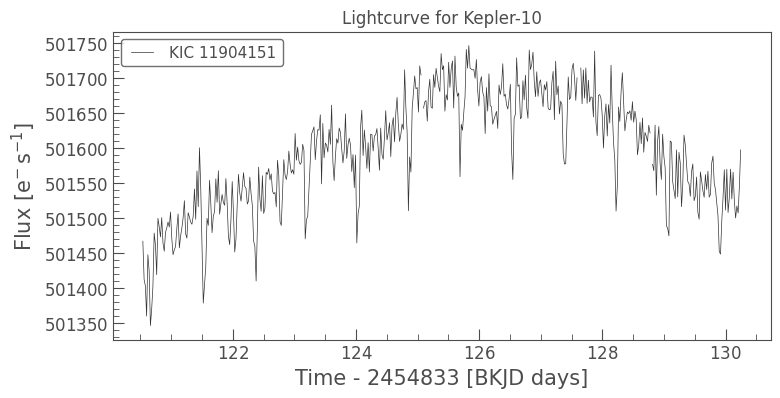

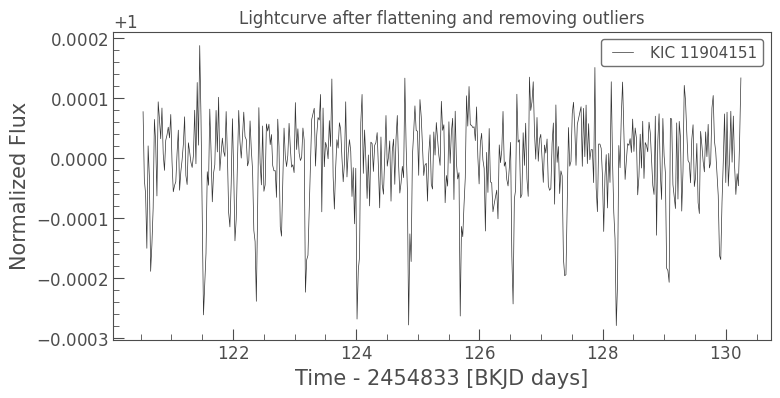

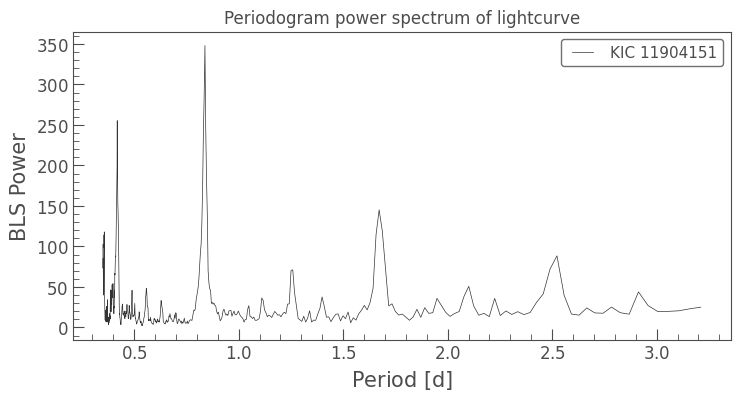

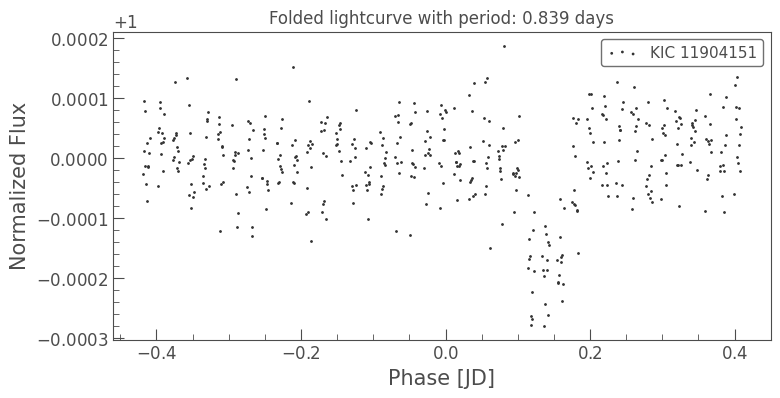

In [4]:
# 引入lightkurve和matplotlib套件
import lightkurve as lk
import matplotlib.pyplot as plt

# 定義用於取得Kepler的光變曲線觀測資料的函式
def get_kepler_lightcurve(target, plot=True):
    search_result = lk.search_lightcurve(target, mission='Kepler')
    lc = search_result[0].download()
    if plot:
        lc.plot()
        plt.title(f'Lightcurve for {target}')

    return lc

# 定義用於前處理光變曲線資料的函式
def preprocess_lightcurve(lc, plot=True):
    # 使用LightCurve物件的flatten()方法來去除光變曲線的趨勢
    processed_lc = lc.flatten()
    # 使用LightCurve物件的remove_outliers()方法來去除光變曲線的異常值
    processed_lc = processed_lc.remove_outliers()
    if plot:
        processed_lc.plot()
        plt.title('Lightcurve after flattening and removing outliers')

    return processed_lc

# 定義用於尋找光變週期的函式
def find_lc_period(lc, plot=True):
    # 使用LightCurve物件的to_periodogram()方法將光變曲線轉換成Periodogram power spectrum，以便看出各週期的強度
    # bls表示使用Box Least Squares這個演算法來計算週期
    periodogram = lc.to_periodogram(method='bls')
    if plot:
        # 繪製Periodogram power spectrum
        periodogram.plot()
        plt.title('Periodogram power spectrum of lightcurve')
    # 使用Periodogram power spectrum物件的period_at_max_power屬性來取得強度最大的週期，即該光變曲線中最明顯的週期性
    lc_period = periodogram.period_at_max_power.value
    
    return lc_period

# 定義用於繪製摺疊光變曲線的函式
def plot_folded_lightcurve(lc, lc_period):
    # 使用LightCurve物件的fold()方法來將光變曲線摺疊，並使用scatter()方法來繪製摺疊後的光變曲線
    folded_lc = lc.fold(period=lc_period)
    folded_lc.scatter()
    plt.title(f'Folded lightcurve with period: {lc_period:.3f} days')

# 下載Kepler-10的光變曲線
lc = get_kepler_lightcurve('Kepler-10')
# 對光變曲線進行資料前處理
processed_lc = preprocess_lightcurve(lc)
# 尋找光變曲線的主要週期
lc_period = find_lc_period(processed_lc)
print(f'可能的行星軌道週期： {lc_period:.3f} 天')
# 繪製摺疊後的光變曲線，以便看出行星凌日現象
plot_folded_lightcurve(processed_lc, lc_period)